In [1]:
import pandas as pd

In [2]:
work_tbl= pd.read_pickle('work_tbl_pickle.pkl')

In [3]:
work_tbl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15583 entries, 1003002379 to 1992994347
Data columns (total 13 columns):
gender_l                15583 non-null object
state_l                 15583 non-null object
type                    15583 non-null object
report_year             15583 non-null object
zip_base                15583 non-null object
bene_day_srvc_cnt       15583 non-null float64
submitted_delta_perc    15583 non-null float64
allowed_delta_perc      15583 non-null float64
quality_measures        15583 non-null object
electronic_measures     15583 non-null object
years_experience        15583 non-null float64
prov_qual_indic         15583 non-null float64
hmaxscore               15583 non-null float64
dtypes: float64(6), object(7)
memory usage: 1.7+ MB


In [4]:
work_tbl['bene_day_srvc_cnt_p'] = work_tbl['bene_day_srvc_cnt']*float(100)/work_tbl['bene_day_srvc_cnt'].mean()
work_tbl['prov_qual_indic_p'] = work_tbl['prov_qual_indic']*float(100)/work_tbl['prov_qual_indic'].mean()
work_tbl['years_experience_p'] = work_tbl['years_experience']*float(100)/work_tbl['years_experience'].mean()
work_tbl['hmaxscore_p'] = work_tbl['hmaxscore']*float(100)/work_tbl['hmaxscore'].mean()


In [5]:
work_tbl['bene_day_srvc_cnt_p'].max()

2423.4522063307204

In [6]:
work_tbl=work_tbl[work_tbl['hmaxscore']>0]
#work_tbl.drop('prov_qual_indic', axis=1, inplace=True)
#work_tbl.drop('gender_l', axis=1, inplace=True)
work_tbl.drop('bene_day_srvc_cnt', axis=1, inplace=True)
work_tbl.drop('prov_qual_indic', axis=1, inplace=True)
work_tbl.drop('years_experience', axis=1, inplace=True)
work_tbl.drop('hmaxscore', axis=1, inplace=True)
work_tbl.drop('report_year', axis=1, inplace=True)
#work_tbl.drop('zip_base', axis=1, inplace=True)

#work_tblx.head()

In [7]:
work_tbl.head()

,gender_l,state_l,type,zip_base,submitted_delta_perc,allowed_delta_perc,quality_measures,electronic_measures,bene_day_srvc_cnt_p,prov_qual_indic_p,years_experience_p,hmaxscore_p
npi_l,,,,,,,,,,,,
1003015553,M,WA,Diagnostic Radiology,98036,5.263123,0.368557,Y,N,919.416025,0.0,183.557599,193.171632
1003016163,F,WA,General Surgery,99216,1.457161,0.275461,Y,N,2.741019,0.0,61.185866,189.624695
1003037037,M,WA,Family Practice,98108,2.250643,0.474117,Y,N,7.570433,0.0,67.304453,192.353108
1003038977,M,WA,Chiropractic,98948,1.007690,0.434800,N,N,22.841823,0.0,110.134559,185.804917
1003046426,M,WA,Family Practice,98557,1.904671,0.451577,Y,N,11.747223,0.0,48.948693,197.809933


In [8]:
#pd.show_versions()

In [9]:
#df.ix[df.my_channel > 20000, 'my_channel'] = 0
#work_tbl.ix[work_tbl['quality_measures'] =='0','quality_measures']='N'
#rows_to_change = work_tbl['quality_measures'] == '0'
#df.loc[rows_to_change, 'status'] = 'DUP'

#work_tbl.quality_measures[work_tbl['quality_measures' ==0]] = 'N'
#[work_tbl['quality_measures'] ==0 , 'quality_measures'] = 'N'

In [10]:
#create dummy columns for 'gender_l',
cols_to_transform = [ 'gender_l', 'quality_measures', 'electronic_measures', 'state_l','zip_base']
#df = pd.get_dummies(df, columns=['type'])
#http://stackoverflow.com/questions/36285155/pandas-get-dummies
df = pd.get_dummies(work_tbl, columns = cols_to_transform )
#df.columns.tolist()

In [11]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#from roc import plot_roc

/Users/aurelperianu/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
#df['gender_l_F'].value_counts()
#df["quality_measures"] = df["quality_measures"] == 'Y'
#df["electronic_measures"] = df["electronic_measures"] == 'Y'
#df['Churn?'] = df['Churn?'] == 'True.

In [13]:
y = df.pop('type').values

In [14]:
#df.head().T

In [15]:
X = df.values

In [16]:
# 6. Use sklearn's train_test_split to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
# 7. Use sklearn's RandomForestClassifier to build a model of your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
# 8. What is the accuracy score on the test data?
print "8. score:", rf.score(X_test, y_test)

8. score: 0.549118387909


In [19]:
y_predict = rf.predict(X_test)
#print "9. confusion matrix:"
#print confusion_matrix(y_test, y_predict)

In [20]:
#print "10. precision:", precision_score(y_test, y_predict)
#print "    recall:", recall_score(y_test, y_predict)

In [21]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True)
rf.fit(X_train, y_train)
print "11: accuracy score:", rf.score(X_test, y_test)
print "    out of bag score:", rf.oob_score_

11: accuracy score: 0.608060453401
    out of bag score: 0.613266162888


In [22]:
print pd.unique(y)

['Diagnostic Radiology' 'General Surgery' 'Family Practice' 'Chiropractic'
 'Physician Assistant' 'Internal Medicine' 'Orthopedic Surgery'
 'Emergency Medicine' 'Nurse Practitioner' 'Psychiatry' 'Cardiology'
 'Anesthesiology' 'Ophthalmology' 'CRNA' 'Optometry' 'Physical Therapist']


In [23]:
#roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
coeff_rd= zip(df.columns[:12], rf.feature_importances_)
#type(coeff[0][1])

In [24]:
ratios = pd.DataFrame(coeff_rd)
keep_col_rf=ratios[0].tolist()
ratios.set_index([0])

,1
0,
submitted_delta_perc,0.161641
allowed_delta_perc,0.133617
bene_day_srvc_cnt_p,0.147729
prov_qual_indic_p,0.003800
years_experience_p,0.107188
hmaxscore_p,0.076153
gender_l_F,0.015986
gender_l_M,0.015568
quality_measures_N,0.007889


In [25]:
feature_importances = np.argsort(rf.feature_importances_)
print "12: top five:", list(df.columns[feature_importances[-1:-6:-1]])

12: top five: ['submitted_delta_perc', 'bene_day_srvc_cnt_p', 'allowed_delta_perc', 'years_experience_p', 'hmaxscore_p']


In [26]:
n = 10 # top 10 features

importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [27]:
# # Print the feature ranking
# print("Feature ranking:")

# for f in range(n):
#     print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
# plt.xticks(range(10), indices)
# plt.xlim([-1, 10])
# plt.show()

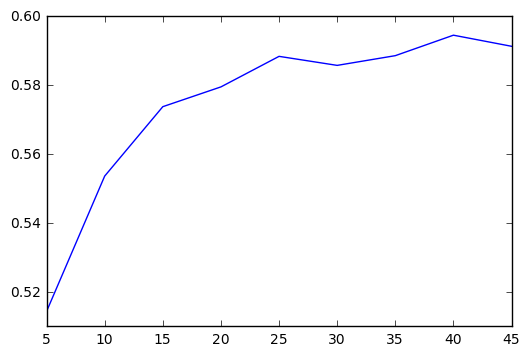

In [28]:
# 14. Try modifying the number of trees
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_trees, accuracies)
plt.show()

In [29]:
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           #precision_score(y_test, y_predict), \
           #recall_score(y_test, y_predict)

print "16. Model, Accuracy, Precision, Recall"
print "    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5)
print "    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test)
print "    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test)
print "    SVM:", get_scores(SVC, X_train, X_test, y_train, y_test)
print "    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test)

16. Model, Accuracy, Precision, Recall
    Random Forest: (0.57732997481108317,)
    Logistic Regression: (0.48816120906801008,)
    Decision Tree: (0.48765743073047857,)
    SVM: (0.32846347607052895,)
    Naive Bayes: (0.1566750629722922,)


In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import StandardScaler
#import plotly.tools as tls

In [31]:
scale = StandardScaler()

In [32]:
#y = work_tbl.pop('type').values
#work_tbl.drop('zip_base', axis=1, inplace=True)
cols_to_transform = [ 'gender_l','state_l', 'quality_measures', 'electronic_measures' ]
#df = pd.get_dummies(df, columns=['type'])
#http://stackoverflow.com/questions/36285155/pandas-get-dummies
df1 = pd.get_dummies(work_tbl, columns = cols_to_transform )
y = df1.pop('type').values

In [33]:
X_pca = scale.fit_transform(df1)
pca = PCA(n_components=6)

In [34]:
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
#pca = PCA(n_components=10)

In [36]:
pca.explained_variance_

array([ 2.65253058,  2.22156016,  1.64214075,  1.1354422 ,  1.06607007,
        0.99106375])

In [37]:
sum(pca.explained_variance_ratio_)

0.74683134720971989

In [38]:
X_pca_transformed = pca.fit_transform(X_pca)

In [39]:
X_pca_transformed.shape

(7940, 6)

In [40]:
#X_pca

In [41]:
df.head()

,submitted_delta_perc,allowed_delta_perc,bene_day_srvc_cnt_p,prov_qual_indic_p,years_experience_p,hmaxscore_p,gender_l_F,gender_l_M,quality_measures_N,quality_measures_Y,...,zip_base_99344,zip_base_99347,zip_base_99350,zip_base_99352,zip_base_99353,zip_base_99354,zip_base_99360,zip_base_99361,zip_base_99362,zip_base_99403
npi_l,,,,,,,,,,,,,,,,,,,,,
1003015553,5.263123,0.368557,919.416025,0.0,183.557599,193.171632,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003016163,1.457161,0.275461,2.741019,0.0,61.185866,189.624695,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003037037,2.250643,0.474117,7.570433,0.0,67.304453,192.353108,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003038977,1.007690,0.434800,22.841823,0.0,110.134559,185.804917,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003046426,1.904671,0.451577,11.747223,0.0,48.948693,197.809933,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:

df_score=df[keep_col_rf]

In [43]:
df_score.head()

,submitted_delta_perc,allowed_delta_perc,bene_day_srvc_cnt_p,prov_qual_indic_p,years_experience_p,hmaxscore_p,gender_l_F,gender_l_M,quality_measures_N,quality_measures_Y,electronic_measures_N,electronic_measures_Y
npi_l,,,,,,,,,,,,
1003015553,5.263123,0.368557,919.416025,0.0,183.557599,193.171632,0.0,1.0,0.0,1.0,1.0,0.0
1003016163,1.457161,0.275461,2.741019,0.0,61.185866,189.624695,1.0,0.0,0.0,1.0,1.0,0.0
1003037037,2.250643,0.474117,7.570433,0.0,67.304453,192.353108,0.0,1.0,0.0,1.0,1.0,0.0
1003038977,1.007690,0.434800,22.841823,0.0,110.134559,185.804917,0.0,1.0,1.0,0.0,1.0,0.0
1003046426,1.904671,0.451577,11.747223,0.0,48.948693,197.809933,0.0,1.0,0.0,1.0,1.0,0.0


In [192]:
adjustments=ratios.copy(deep=True)
ratios_orig=ratios.copy(deep=True)
adjustments

,0,1
0,submitted_delta_perc,0.161641
1,allowed_delta_perc,0.133617
2,bene_day_srvc_cnt_p,0.147729
3,prov_qual_indic_p,0.003800
4,years_experience_p,0.107188
5,hmaxscore_p,0.076153
6,gender_l_F,0.015986
7,gender_l_M,0.015568
8,quality_measures_N,0.007889
9,quality_measures_Y,0.007828


In [193]:
# adjustments[1][0]=-5*adjustments[1][0]
# adjustments[1][1]=-5*adjustments[1][1]
# adjustments[1][2]=-5*adjustments[1][2]
# adjustments[1][3]=10*adjustments[1][3]
# adjustments[1][4]=5*adjustments[1][4]
# adjustments[1][5]=10*adjustments[1][5]
# adjustments[1][6]=10*adjustments[1][6]
# adjustments[1][7]=10*adjustments[1][7]
# adjustments[1][8]=10*adjustments[1][8]
# adjustments[1][9]=10*adjustments[1][9]
# adjustments[1][10]=10*adjustments[1][10]
# adjustments[1][11]=10*adjustments[1][11]
# adjustments.head()
adjustments[1][0]=-7*adjustments[1][0]
adjustments[1][1]=-7*adjustments[1][1]
adjustments[1][2]=-7*adjustments[1][2]
adjustments[1][3]=10*adjustments[1][3]
adjustments[1][4]=5*adjustments[1][4]
adjustments[1][5]=10*adjustments[1][5]
adjustments[1][6]=10*adjustments[1][6]
adjustments[1][7]=10*adjustments[1][7]
adjustments[1][8]=10*adjustments[1][8]
adjustments[1][9]=10*adjustments[1][9]
adjustments[1][10]=10*adjustments[1][10]
adjustments[1][11]=10*adjustments[1][11]
adjustments.head()
#df_score.shape

/Users/aurelperianu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aurelperianu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aurelperianu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aurelperianu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A

,0,1
0,submitted_delta_perc,-1.131485
1,allowed_delta_perc,-0.935316
2,bene_day_srvc_cnt_p,-1.034103
3,prov_qual_indic_p,0.038002
4,years_experience_p,0.535939


In [194]:
#ret.dot(df3.set_index('Symbol'))
scores=df_score.dot(ratios.set_index([0]))
scores_orig=df_score.dot(ratios_orig.set_index([0]))
scores_adj=df_score.dot(adjustments.set_index([0]))

In [186]:
scores.index.values

array([1003015553, 1003016163, 1003037037, ..., 1992984934, 1992989693,
       1992992655])

In [130]:
wa_data_provider_14_gr= pd.read_pickle('wa_data_provider_14_gr_pickle.pkl')

In [131]:
wa_data_provider_14_gr.set_index(['npi'], inplace=True)
wa_data_provider_14_adjust=wa_data_provider_14_gr.copy()

In [132]:
scores.head()

,1
npi_l,
1003015553,171.155024
1003016163,21.721400
1003037037,23.452843
1003038977,29.594971
1003046426,22.458980


In [133]:
result = pd.concat([wa_data_provider_14_gr, scores], axis=1, join='inner')

In [134]:

result.rename(columns={1: 'indiv_score'}, inplace=True)
result.head().T


,1003015553,1003016163,1003037037,1003038977,1003046426
last_org_name,FISHMAN,HARTSHORN,PARADA,COVINGTON,RODAKOWSKI
first_name,MICHAEL,HEATHER,GREGORY,MICHAEL,JOHN
mi,S,A,,J,L
credentials,M.D.,M.D.,M.D.,DC,M.D.
gender,M,F,M,M,M
street1,19020 33RD AVE W,1414 N HOUK RD STE 203,8720 14TH AVE S,604 W 4TH AVE,322 S. BIRCH STREET
street2,SUITE 210,,,SUITE B,
city,LYNNWOOD,SPOKANE VALLEY,SEATTLE,TOPPENISH,MCCLEARLY
zip,980364746.0,992161097.0,98108.0,989481673.0,985579522.0
state,WA,WA,WA,WA,WA


In [135]:
test_98036=result[(result['zip_base']=='98036') & (result['type']=='Diagnostic Radiology')].sort_values('indiv_score', ascending=False)

In [136]:
test_98036.tail(20).T

,1275589871,1568440113,1891944260,1497954317,1144364605,1467489229,1851379317,1669489472,1205864204,1164400610,1790762946,1336126242,1093931602,1376654947,1255442737,1912939679,1477740009,1902058555,1306006531,1386818516
last_org_name,DOO,HALLAM,VORIA,MCCULLOUGH,SUSANTO,JAIN,SHOOK,KEOGH,BROCKENBROUGH,PARIKH,DALY,FERGUSON,MYERS,STONE,WILSON,OSNIS,RAY,ITAGAKI,SMITH,BREZAK
first_name,ELLA,PAULA,POOJA,BRENDAN,DANIEL,SMITA,JENNIFER,BART,KIMBERLY,SANJIV,CHARLES,GEOFFREY,KIRK,KAREN,MARK,ROBERT,ERIK,MICHAEL,JUSTIN,ROBERT
mi,C,S,R,J,,,E,P,B,R,P,S,V,M,A,B,S,W,B,A
credentials,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,D.O.,M.D.,M.D.,M.D.,M.D.,M.D.,M.D.,MD
gender,F,F,F,M,M,F,F,M,F,M,M,M,M,F,M,M,M,M,M,M
street1,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W,19020 33RD AVE W
street2,SUITE 210,SUITE 210,STE 210,SUITE 210,STE 210,SUITE 210,STE 210,SUITE 210,SUITE 210,SUITE 210,SUITE 210,SUITE 210,SUITE 210,STE 210,STE 210,SUITE 210,SUITE 210,SUITE 210,STE 210,SUITE 210
city,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD,LYNNWOOD
zip,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746,980364746
state,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA


In [137]:
#wa_data_provider_14_adjust.head()

In [195]:
#use the adjustments array
result_adj = pd.concat([wa_data_provider_14_adjust, scores_adj], axis=1, join='inner')
result_adj.rename(columns={1: 'indiv_score'}, inplace=True)
#result_adj.head().T

In [196]:
test_98036=result_adj[(result_adj['zip_base']=='98036') & (result_adj['type']=='Diagnostic Radiology')].sort_values('indiv_score', ascending=False)

In [197]:
#test_98036.tail(20)

In [198]:
test_98036.ix[1386818516]

last_org_name                         BREZAK
first_name                            ROBERT
mi                                         A
credentials                               MD
gender                                     M
street1                     19020 33RD AVE W
street2                            SUITE 210
city                                LYNNWOOD
zip                                980364746
state                                     WA
country                                   US
type                    Diagnostic Radiology
report_year                             2014
zip_base                               98036
line_srvc_cnt                            149
bene_unique_cnt                          148
bene_day_srvc_cnt                        149
allowed_amt                          192.377
submitted_chrg_amt                     609.3
payment_amt                          147.998
standard_amt                         143.177
submitted_delta                      461.302
allowed_de

In [199]:
test_98036.ix[1275589871]

last_org_name                            DOO
first_name                              ELLA
mi                                         C
credentials                             M.D.
gender                                     F
street1                     19020 33RD AVE W
street2                            SUITE 210
city                                LYNNWOOD
zip                                980364746
state                                     WA
country                                   US
type                    Diagnostic Radiology
report_year                             2014
zip_base                               98036
line_srvc_cnt                           1137
bene_unique_cnt                         1130
bene_day_srvc_cnt                       1137
allowed_amt                          309.799
submitted_chrg_amt                      1074
payment_amt                          235.871
standard_amt                         242.798
submitted_delta                      838.129
allowed_de